In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd

# Dosya yolu
file_path = '/content/drive/MyDrive/Colab Notebooks/A_Z Handwritten Data.csv'

# CSV'yi oku (başlık satırı yok, bu yüzden header=None)
df = pd.read_csv(file_path, header=None)

# İlk 5 satırı göster
df.head()


,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
columns = ['label'] + [f'pixel{i}' for i in range(1, 785)]
df.columns = columns


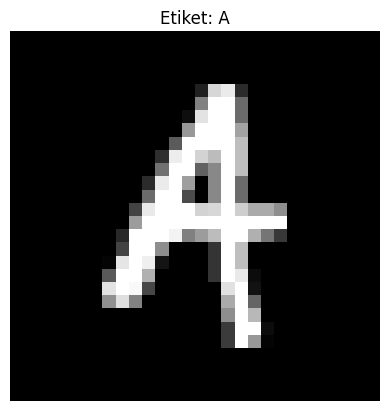

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# İlk görseli alalım (index = 0)
index = 0
image = df.iloc[index, 1:].values.reshape(28, 28)  # 1. sütundan sonrası pikseller
label = df.iloc[index, 0]  # 0. sütun -> etiket (0-25)

# Görseli çiz
plt.imshow(image, cmap='gray')
plt.title(f"Etiket: {chr(label + 65)}")  # ASCII: 0 → A
plt.axis('off')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Özellikler (X) ve etiketler (y)
X = df.drop('label', axis=1).values
y = df['label'].values

# Veriyi 0–255 aralığından 0–1 aralığına çevir (normalizasyon)
X = X / 255.0

# Görselleri 28x28x1 şekline getir (CNN için reshape gerekiyor)
X = X.reshape(-1, 28, 28, 1)

# Etiketleri one-hot encode et (26 sınıf için)
y = to_categorical(y, num_classes=26)

# Eğitim ve test verisini ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

# 1. Konvolüsyon katmanı
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2. Konvolüsyon katmanı
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Flatten → Fully connected
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Overfit'i azaltmak için dropout
model.add(Dense(26, activation='softmax'))  # 26 harf sınıfı için

# Derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 227,098 (887.10 KB)

 Trainable params: 227,098 (887.10 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_test, y_test)
)


Epoch 1/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.8347 - loss: 0.5773 - val_accuracy: 0.9790 - val_loss: 0.0764
Epoch 2/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9605 - loss: 0.1391 - val_accuracy: 0.9832 - val_loss: 0.0570
Epoch 3/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9711 - loss: 0.1029 - val_accuracy: 0.9867 - val_loss: 0.0486
Epoch 4/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9761 - loss: 0.0842 - val_accuracy: 0.9879 - val_loss: 0.0431
Epoch 5/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9802 - loss: 0.0692 - val_accuracy: 0.9894 - val_loss: 0.0384
Epoch 6/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9821 - loss: 0.0624 - val_accuracy: 0.9903 - val_loss: 0.0368
Epoch 7/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9837 - loss: 0.0542 - val_accuracy: 0.9902 - val_loss: 0.0352
Epoch 8/10
2619/2619 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9849 - loss: 0.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


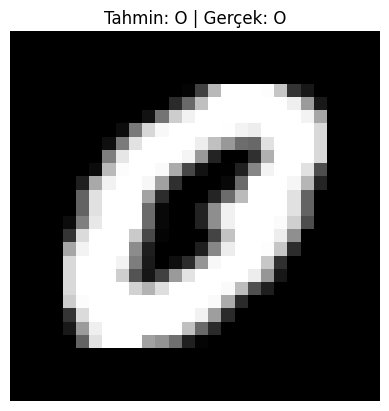

✅ Doğru tahmin!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Rastgele bir index seç
i = np.random.randint(0, len(X_test))

# Görseli ve etiketi al
img = X_test[i]  # (28,28,1)
true_label = np.argmax(y_test[i])  # One-hot vektörden gerçek sınıfı al

# Modelle tahmin yap
prediction = model.predict(img.reshape(1, 28, 28, 1))
predicted_label = np.argmax(prediction)

# Harf karşılığı (ASCII: 0 → A, 1 → B, ...)
true_char = chr(true_label + 65)
pred_char = chr(predicted_label + 65)

# Görseli çiz
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title(f"Tahmin: {pred_char} | Gerçek: {true_char}")
plt.axis('off')
plt.show()

# Tahmin doğruluğu mesajı
if true_label == predicted_label:
    print("✅ Doğru tahmin!")
else:
    print("❌ Yanlış tahmin.")


In [ ]:
model.save("harf_tanima_modeli.h5")


In [ ]:
from google.colab import files
files.download("harf_tanima_modeli.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from google.colab import files

# X_test ve y_test zaten bellekte varsa bu satırları direkt çalıştırabilirsin:
np.save("X_test.npy", X_test)
np.save("y_test.npy", y_test)

# Bilgisayarına indir
files.download("X_test.npy")
files.download("y_test.npy")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>